In [3]:
import pandas as pd

file_path = '/Users/jaeeunpark/Desktop/data/KRvideos.csv'

data = pd.read_csv(file_path, encoding='utf-8', encoding_errors='ignore')

print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   trending_date           34567 non-null  object
 2   title                   34567 non-null  object
 3   channel_title           34567 non-null  object
 4   category_id             34567 non-null  int64 
 5   publish_time            34567 non-null  object
 6   tags                    34567 non-null  object
 7   views                   34567 non-null  int64 
 8   likes                   34567 non-null  int64 
 9   dislikes                34567 non-null  int64 
 10  comment_count           34567 non-null  int64 
 11  thumbnail_link          34567 non-null  object
 12  comments_disabled       34567 non-null  bool  
 13  ratings_disabled        34567 non-null  bool  
 14  video_error_or_removed  34567 non-null  bool  
 15  de

In [5]:
import json

json_file_path = '/Users/jaeeunpark/Desktop/data/KR_category_id.json'

with open(json_file_path, 'r', encoding='utf-8') as file:
    category_data = json.load(file)

print(category_data)

{'kind': 'youtube#videoCategoryListResponse', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"', 'items': [{'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}, {'kind': 'yout

In [9]:
category_mapping = {int(item['id']): item['snippet']['title'] for item in category_data['items']}

print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [13]:
data['category_name'] = data['category_id'].map(category_mapping)

In [15]:
print(data[['category_id','category_name']].head())

   category_id    category_name
0           22   People & Blogs
1           25  News & Politics
2           22   People & Blogs
3           25  News & Politics
4           25  News & Politics


## <광고성 콘텐츠 vs 비광고성 콘텐츠 - CTR 비교>

### 1. 광고성 콘텐츠를 나타내는 키워드가 포함된 제목을 기준으로 콘텐츠 분류

In [21]:
ad_keywords = ['이벤트', '신제품', '할인', '협찬', '광고', '스폰서']

data['is_ad_keyword'] = data['title'].apply(lambda x: 1 if any(word in x for word in ad_keywords) else 0)

ad_keyword_count = data['is_ad_keyword'].sum()
total_content = len(data)

print(f"광고성 키워드가 포함된 콘텐츠 개수: {ad_keyword_count}")
print(f"전체 콘텐츠 개수: {total_content}")
print(f"광고성 콘텐츠 비율: {ad_keyword_count / total_content * 100:.2f}%")

광고성 키워드가 포함된 콘텐츠 개수: 250
전체 콘텐츠 개수: 34567
광고성 콘텐츠 비율: 0.72%


#### 인사이트: 

키워드만으로 광고성 콘텐츠를 분류하면 광고성 콘텐츠의 비율이 너무 낮게 나옴 -> 위 방법만으로 분류하기엔 부족함

### 광고성/비광고성 콘텐츠의 CTR 비교

In [29]:
data['CTR'] = data.apply(lambda x: ((x['likes'] + x['comment_count']) / x['views']) * 100 if x['views'] > 0 else 0, axis=1)

print(data[['views', 'likes', 'comment_count', 'CTR']].head())

    views  likes  comment_count       CTR
0  156130   1422            272  1.084993
1   76533    211            113  0.423347
2  421409   5112            459  1.321994
3  222850   2093           1219  1.486201
4   84466   1094            450  1.827954


In [31]:
ad_keyword_ctr = data[data['is_ad_keyword'] == 1]['CTR'].mean()

non_ad_keyword_ctr = data[data['is_ad_keyword'] == 0]['CTR'].mean()

print(f"광고성 키워드 포함 콘텐츠의 평균 CTR: {ad_keyword_ctr:.2f}%")
print(f"비광고성 콘텐츠의 평균 CTR: {non_ad_keyword_ctr:.2f}%")

광고성 키워드 포함 콘텐츠의 평균 CTR: 4.33%
비광고성 콘텐츠의 평균 CTR: 2.51%


#### 인사이트:

광고성 키워드를 포함한 콘텐츠의 평균 CTR이 비광고성 콘텐츠의 평균 CTR보다 높음

In [43]:
# t-test

from scipy.stats import ttest_ind

ad_CTR = data[data['is_ad_keyword'] == 1]['CTR']
non_ad_CTR = data[data['is_ad_keyword'] == 0]['CTR']

t_stat, p_value = ttest_ind(ad_CTR, non_ad_CTR, equal_var=False) 

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 3.8618
P-value: 0.0001


#### T-검정 결과:

T-값이 2 이상이고 P-value가 0.05보다 훨씬 작은 값이므로 통계적으로 유의미함

#### 분석 결과:

광고성 콘텐츠가 비광고성 콘텐츠에 비해 CTR에서 약 1.72%포인트 더 높은 반응을 얻고 있음을 의미함
즉, 광고성 키워드가 포함된 콘텐츠는 소비자들의 클릭과 반응을 더 많이 유도할 가능성이 큼

하지만, 광고성 키워드가 포함된 콘텐츠는 전체 데이터셋에서 0.72%에 불과했기 때문에, 샘플 크기의 불균형이 분석 결과의 신뢰성에 영향을 미쳤을 가능성도 있음

따라서, 향후 분석에서는 tags, description 필드까지 포함하여 더 많은 광고성 콘텐츠를 식별하고, 더 큰 샘플 크기로 분석할 필요성이 있음

### 2. 광고성 콘텐츠를 나타내는 키워드 포함된 title, tag, description을 기준으로 콘텐츠 분류

In [51]:
ad_keywords = ['이벤트', '신제품', '할인', '협찬', '광고', '스폰서']

def is_ad_content(row):
    for keyword in ad_keywords:
        if (keyword in str(row['title'])) or (keyword in str(row['tags'])) or (keyword in str(row['description'])):
            return 1
    return 0

data['is_ad_combined'] = data.apply(is_ad_content, axis=1)

ad_combined_count = data['is_ad_combined'].sum()
total_content = len(data)

print(f"광고성 콘텐츠 개수 (title, tags, description 기준): {ad_combined_count}")
print(f"광고성 콘텐츠 비율: {ad_combined_count / total_content * 100:.2f}%")

광고성 콘텐츠 개수 (title, tags, description 기준): 1936
광고성 콘텐츠 비율: 5.60%


#### 인사이트:

광고성 콘텐츠의 범위를 title에서 tags와 description까지 확장하여 광고성 키워드가 포함된 콘텐츠를 더 포괄적으로 식별함으로써 광고성 콘텐츠의 비율이 0.72%에서 5.60%로 증가함

### 광고성/비광고성 콘텐츠의 CTR 비교

In [54]:
ad_combined_ctr = data[data['is_ad_combined'] == 1]['CTR'].mean()
non_ad_combined_ctr = data[data['is_ad_combined'] == 0]['CTR'].mean()

print(f"광고성 콘텐츠의 평균 CTR (포괄적 기준): {ad_combined_ctr:.2f}%")
print(f"비광고성 콘텐츠의 평균 CTR: {non_ad_combined_ctr:.2f}%")

광고성 콘텐츠의 평균 CTR (포괄적 기준): 3.13%
비광고성 콘텐츠의 평균 CTR: 2.49%


#### 인사이트:

광고성 키워드를 포함한 콘텐츠의 평균 CTR이 비광고성 콘텐츠의 평균 CTR보다 높음

In [56]:
# t-test

from scipy.stats import ttest_ind

ad_CTR_combined = data[data['is_ad_combined'] == 1]['CTR']
non_ad_CTR_combined = data[data['is_ad_combined'] == 0]['CTR']

t_stat, p_value = ttest_ind(ad_CTR_combined, non_ad_CTR_combined, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 5.4209
P-value: 0.0000


#### T-검정 결과:

T-값이 2 이상이고 P-value가 0.05보다 훨씬 더 작은 값이므로 통계적으로 매우 유의미함

#### 분석 결과:

광고성 콘텐츠의 정의를 title에만 국한하지 않고, tags와 description까지 포함하는 것이 더욱 신뢰할 만한 분석 기준임
또한, 광고성 콘텐츠의 비율이 5.60%로 증가함에 따라, CTR 분석의 신뢰성도 함께 높아졌고, 광고 콘텐츠가 실제로 클릭을 더 많이 유도할 가능성이 크다는 점이 명확히 드러남

## <광고성 콘텐츠 vs 비광고성 콘텐츠 - 반응 패턴 비교>

### 1. 광고성 콘텐츠의 수와 동일하게 비광고성 콘텐츠에서 1,936개를 랜덤하게 추출하여 비교 데이터셋 생성

In [71]:
import random

ad_data = data[data['is_ad_combined'] == 1]
non_ad_data = data[data['is_ad_combined'] == 0].sample(n=len(ad_data), random_state=42)

balanced_data = pd.concat([ad_data, non_ad_data])

print(f"광고성 콘텐츠 수: {len(ad_data)}")
print(f"비광고성 콘텐츠 수: {len(non_ad_data)}")
print(f"전체 비교 데이터셋 크기: {len(balanced_data)}")

광고성 콘텐츠 수: 1936
비광고성 콘텐츠 수: 1936
전체 비교 데이터셋 크기: 3872


### 2. 조회수, 좋아요, 댓글 수 평균 비교

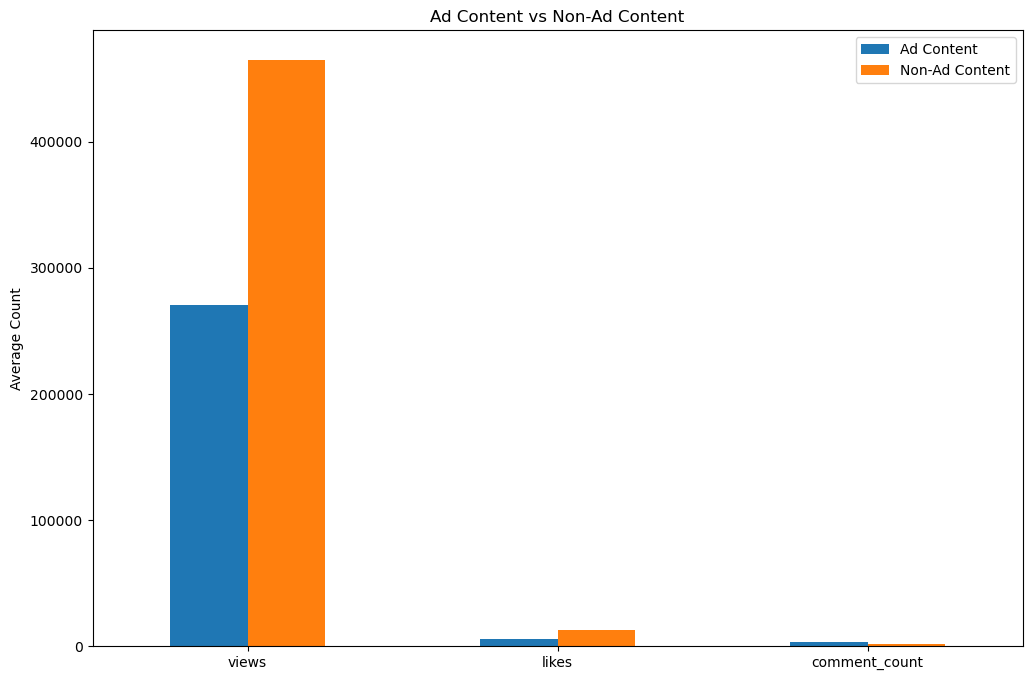

In [76]:
balanced_ad_reactions = balanced_data[balanced_data['is_ad_combined'] == 1][['views', 'likes', 'comment_count']].mean()
balanced_non_ad_reactions = balanced_data[balanced_data['is_ad_combined'] == 0][['views', 'likes', 'comment_count']].mean()

balanced_reaction_df = pd.DataFrame({'Ad Content': balanced_ad_reactions, 'Non-Ad Content': balanced_non_ad_reactions})

balanced_reaction_df.plot(kind='bar', figsize=(12, 8), color=['#1f77b4', '#ff7f0e'])
plt.title("Ad Content vs Non-Ad Content")
plt.xticks(rotation=0)
plt.ylabel("Average Count")
plt.show()

#### 인사이트:

비광고성 콘텐츠는 조회수에서 압도적으로 더 높은 수치를 보인 반면 광고성 콘텐츠는 CTR은 더 높았지만 조회수가 상대적으로 낮음
이는 광고성 콘텐츠가 특정 관심 키워드(이벤트, 신제품)에 반응하는 사용자의 클릭을 유도하는 것에는 성공하였으나, 시청자가 콘텐츠를 끝까지 시청하지 않았을 가능성을 시사함

광고성 콘텐츠가 CTR에서는 높은 값을 기록했지만, 조회수와 댓글 수에서는 두드러지지 않았다는 점에서, 광고성 콘텐츠의 효과를 더욱 극대화하기 위해서는 클릭 유도 요소와 함께 사용자 반응을 유도할 수 있는 콘텐츠 기획이 필요함

## <광고성 콘텐츠의 카테고리별 CTR 분석>

In [80]:
ad_data = data[data['is_ad_combined'] == 1]
category_ctr = ad_data.groupby('category_name')['CTR'].mean().sort_values(ascending=False)

print(category_ctr)

category_name
Gaming                  6.165123
Education               4.584111
Pets & Animals          3.511803
Music                   3.106573
Howto & Style           3.071116
Comedy                  2.992444
People & Blogs          2.662973
Entertainment           2.560586
News & Politics         2.446814
Film & Animation        1.892541
Sports                  1.462116
Science & Technology    1.285989
Autos & Vehicles        1.193194
Shows                   0.730402
Travel & Events         0.694252
Name: CTR, dtype: float64


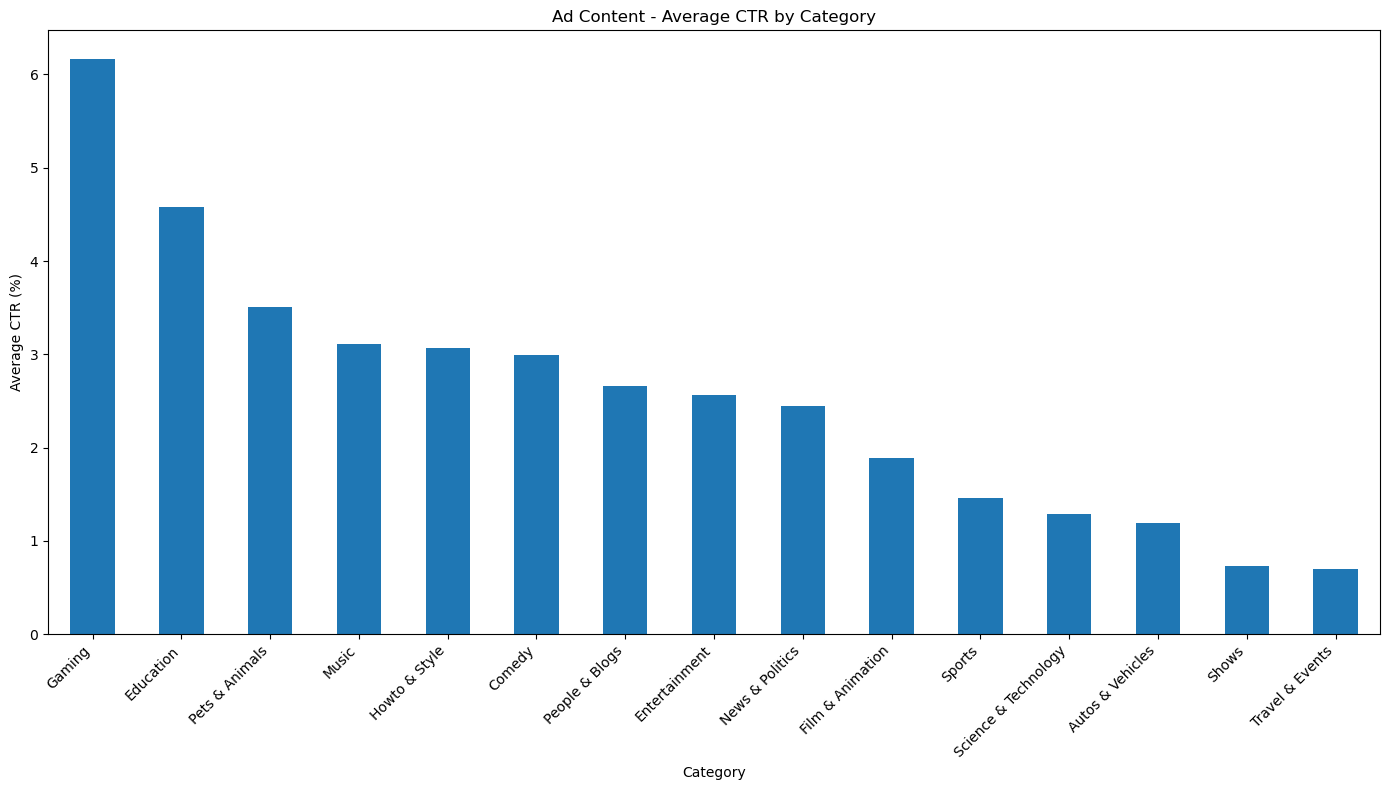

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
category_ctr.plot(kind='bar', color='#1f77b4')
plt.title("Ad Content - Average CTR by Category")
plt.xlabel("Category")
plt.ylabel("Average CTR (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 인사이트:

CTR이 가장 높은 카테고리: Gaming (6.17%)
신제품 출시, 한정판 아이템, 할인 이벤트와 같은 즉각적인 혜택이 클릭을 강하게 유도했을 가능성이 있음

CTR이 두 번째로 높은 카테고리: Education (4.58%)
강의 할인, 학습 자료 출시와 같은 유용한 혜택이 클릭을 유도했을 가능성이 있음

CTR이 세 번째로 높은 카테고리: Pets & Animals (3.51%)
펫 제품 할인, 신제품 소개 콘텐츠가 관심을 끌었을 가능성이 있음